# Exploratory Data Analysis

This notebook will be used to conduct exploratory data analysis (EDA) on the data set, which contains all statistics. Note that these graphs use our dataset, which only dates back to 1987.

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import numpy as np
import random

In [2]:
all_stats = pd.read_csv('all_stats.csv')

In [3]:
all_stats.head(5)

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Year,Pts Won,Pts Max,Share,Team,Wins,Losses,W%
0,0,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,...,2.2,10.8,1987,0.0,780.0,0.0,Los Angeles Lakers,65,17,0.79268
1,1,Adrian Branch,SF,23,LAL,32,0,6.8,1.5,3.0,...,1.2,4.3,1987,0.0,780.0,0.0,Los Angeles Lakers,65,17,0.79268
2,2,Billy Thompson,SF,23,LAL,59,0,12.9,2.4,4.4,...,2.5,5.6,1987,0.0,780.0,0.0,Los Angeles Lakers,65,17,0.79268
3,3,Byron Scott,SG,25,LAL,82,82,33.3,6.8,13.8,...,2.0,17.0,1987,0.0,780.0,0.0,Los Angeles Lakers,65,17,0.79268
4,4,James Worthy,SF,25,LAL,82,82,34.4,7.9,14.7,...,2.5,19.4,1987,0.0,780.0,0.0,Los Angeles Lakers,65,17,0.79268


In [4]:
del all_stats['Unnamed: 0']

In [5]:
all_stats=pd.DataFrame(all_stats)

In [6]:
#Filtered stats dataframe so we can look at players who have played at least 15 games in the season
filtered_stats = all_stats[all_stats['G'] > 15]

In [7]:
filtered_stats.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Wins,Losses,W%
count,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,12951.000000,...,14438.000000,14438.000000,14438.000000,14438.00000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000
mean,26.761116,59.481438,29.392714,21.995276,3.441834,7.544965,0.450316,0.584839,1.661733,0.275459,...,1.309059,2.005132,9.156240,2006.10320,7.401572,1118.880039,0.006663,39.907328,40.197049,0.498092
std,4.188790,19.309233,29.471065,9.464800,2.212145,4.629010,0.064620,0.706457,1.863027,0.153701,...,0.798520,0.766397,6.014455,10.54451,70.726334,140.622654,0.063050,12.794224,12.765391,0.154530
min,18.000000,16.000000,0.000000,1.900000,0.100000,0.300000,0.077000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.100000,1987.00000,0.000000,780.000000,0.000000,7.000000,9.000000,0.106060
25%,23.000000,46.000000,2.000000,14.200000,1.700000,3.900000,0.411000,0.000000,0.100000,0.200000,...,0.700000,1.400000,4.500000,1997.00000,0.000000,1010.000000,0.000000,30.000000,30.000000,0.378050
50%,26.000000,64.000000,17.000000,21.600000,2.900000,6.500000,0.446000,0.300000,1.000000,0.321000,...,1.100000,2.000000,7.700000,2007.00000,0.000000,1180.000000,0.000000,41.000000,39.000000,0.512200
75%,30.000000,77.000000,58.000000,30.000000,4.800000,10.400000,0.486000,1.000000,2.800000,0.371000,...,1.800000,2.500000,12.600000,2015.00000,0.000000,1240.000000,0.000000,50.000000,49.000000,0.611110
max,43.000000,85.000000,83.000000,43.700000,13.400000,27.800000,0.819000,5.300000,13.200000,1.000000,...,5.700000,4.600000,37.100000,2023.00000,1310.000000,1310.000000,1.000000,73.000000,72.000000,0.890240


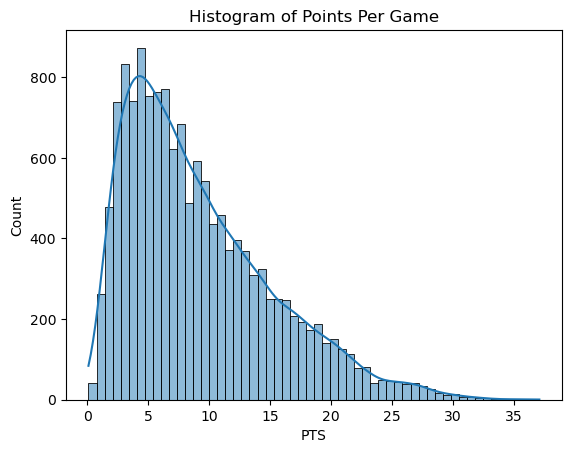

In [8]:
sns.histplot(data=filtered_stats, x='PTS', kde=True)
plt.title('Histogram of Points Per Game')
plt.show()

Appears Points Per Game is right-skewed.

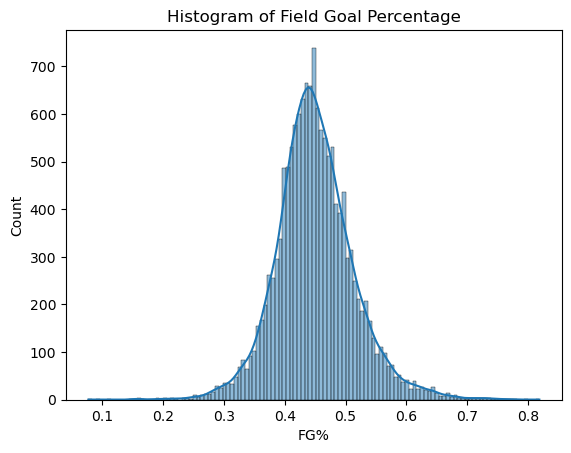

In [9]:
sns.histplot(data=filtered_stats, x='FG%', kde=True)
plt.title('Histogram of Field Goal Percentage')
plt.show()

Field Goal Percentage appears bell-shaped.

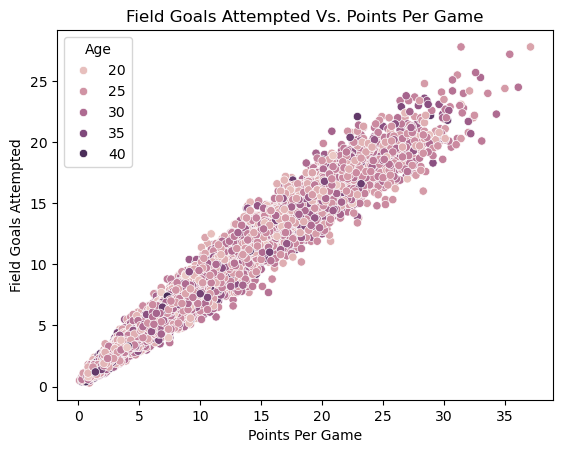

In [10]:
ax = sns.scatterplot(data=filtered_stats, x='PTS', y='FGA',hue='Age')
ax.set_title('Field Goals Attempted Vs. Points Per Game')
ax.set_xlabel('Points Per Game')
ax.set_ylabel('Field Goals Attempted')
plt.show()

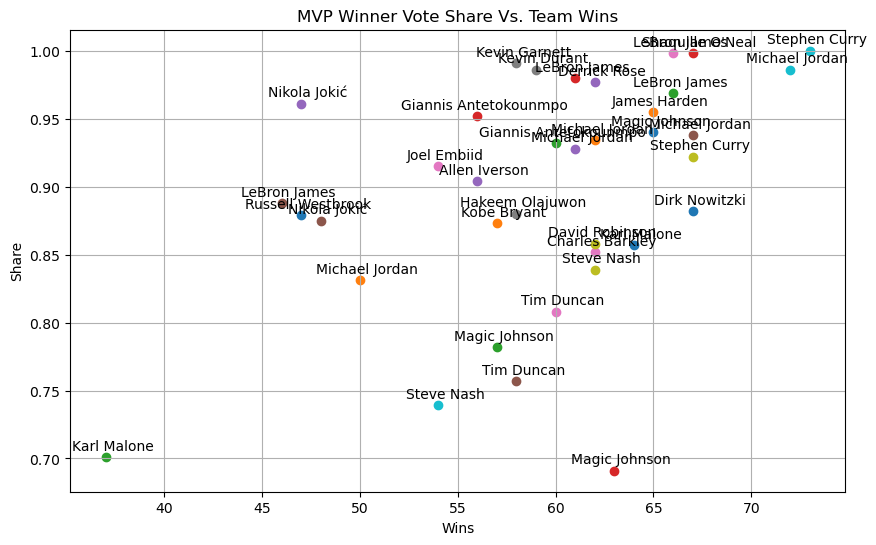

In [11]:
highest_share_players_idx = all_stats.groupby('Year')['Share'].idxmax()
highest_share_players = all_stats.loc[highest_share_players_idx]

plt.figure(figsize=(10, 6))
for idx, row in highest_share_players.iterrows():
    plt.scatter(row['Wins'], row['Share'], label=row['Year'])
    plt.annotate(row['Player'], (row['Wins'], row['Share']), textcoords="offset points", xytext=(5,5), ha='center')
plt.xlabel('Wins')
plt.ylabel('Share')
plt.title('MVP Winner Vote Share Vs. Team Wins')
plt.grid(True)
plt.show()

It appears most of the players that ended up winning the MVP were on teams with over 55 wins. Only one player has won MVP on a losing team. We can also see that there has only been one team to ever win MVP unanimously. This was Steph Curry in the 2015-16 season. Both LeBron James and Shaquille O'Neal came very close to accomplishing this. 

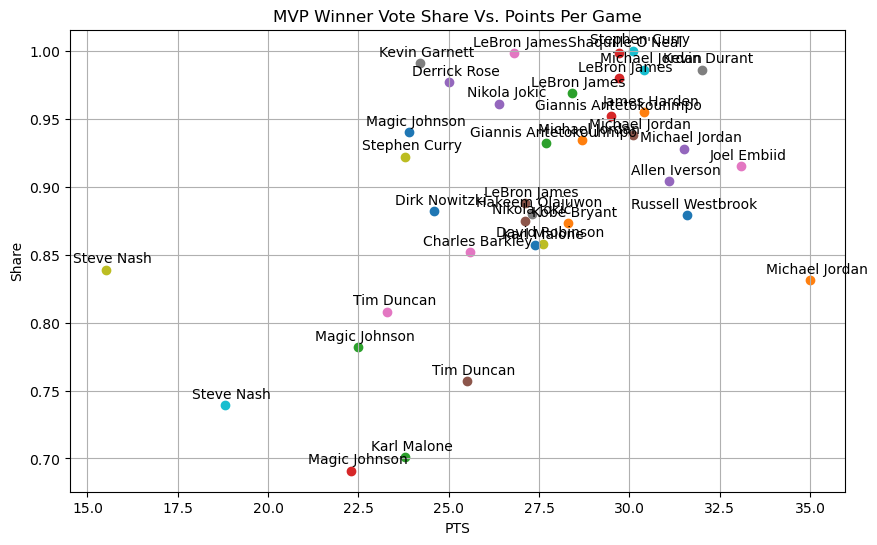

In [12]:
max_share_indices = all_stats.groupby('Year')['Share'].idxmax()
highest_share_players = all_stats.loc[max_share_indices]

plt.figure(figsize=(10, 6))
for idx, row in highest_share_players.iterrows():
    plt.scatter(row['PTS'], row['Share'], label=row['Year'])
    plt.annotate(row['Player'], (row['PTS'], row['Share']), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('PTS')
plt.ylabel('Share')
plt.title('MVP Winner Vote Share Vs. Points Per Game')
plt.grid(True)
plt.show()

We can see the majority of players to win MVP have at least 22.5 PPG.

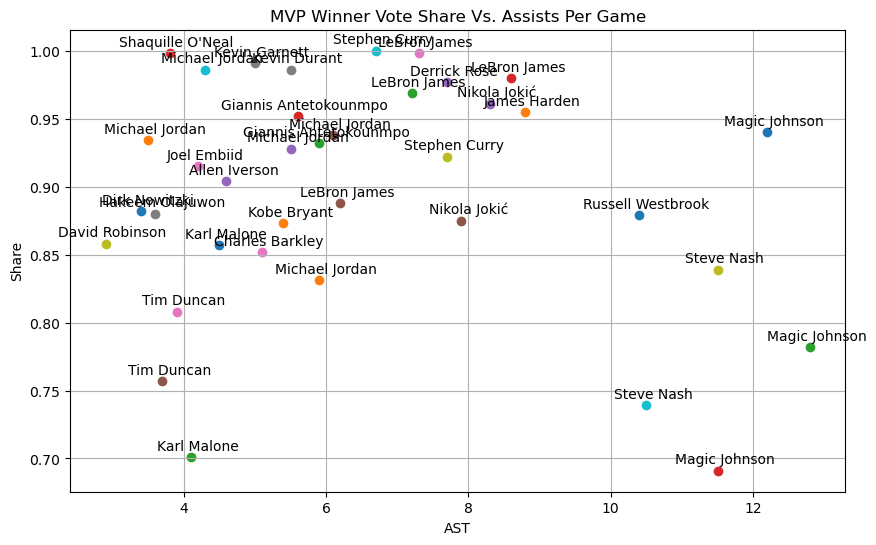

In [13]:
max_share_indices = all_stats.groupby('Year')['Share'].idxmax()
highest_share_players = all_stats.loc[max_share_indices]

plt.figure(figsize=(10, 6))
for idx, row in highest_share_players.iterrows():
    plt.scatter(row['AST'], row['Share'], label=row['Year'])
    plt.annotate(row['Player'], (row['AST'], row['Share']), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('AST')
plt.ylabel('Share')
plt.title('MVP Winner Vote Share Vs. Assists Per Game')
plt.grid(True)
plt.show()

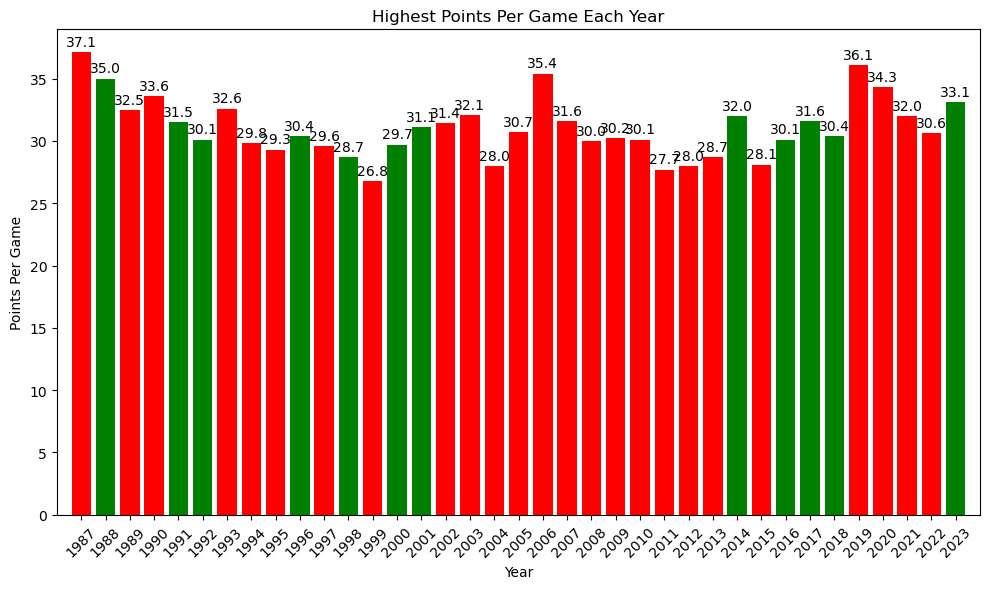

In [14]:
idx_max_pts = filtered_stats.groupby('Year')['PTS'].idxmax()
highest_scoring_by_year = filtered_stats.loc[idx_max_pts, ['Year', 'PTS', 'Player']].reset_index(drop=True)

idx_max_share = filtered_stats.groupby('Year')['Share'].idxmax()
highest_share_by_year = filtered_stats.loc[idx_max_share, ['Year', 'Share', 'Player']].reset_index(drop=True)

#Custom Colors
colors = []
for year in highest_scoring_by_year['Year']:
    scoring_player = highest_scoring_by_year[highest_scoring_by_year['Year'] == year]['Player'].values[0]  
    share_player = highest_share_by_year[highest_share_by_year['Year'] == year]['Player'].values[0]  
    
    if scoring_player == share_player:
        colors.append('green')
    else:
        colors.append('red')

plt.figure(figsize=(10, 6))
plt.bar(highest_scoring_by_year['Year'], highest_scoring_by_year['PTS'], color=colors)
plt.xlabel('Year')
plt.ylabel('Points Per Game')
plt.xticks(range(1987, 2024), rotation=45)
plt.xlim(1986, 2024)
plt.title('Highest Points Per Game Each Year') 
plt.grid(False)
plt.tight_layout()

for i, value in enumerate(highest_scoring_by_year['PTS']):
    plt.text(highest_scoring_by_year['Year'].iloc[i], value + 0.5, str(value), ha='center', color='black')

plt.show()

This graph shows the highest-scoring player by PPG in each season. If the bar is green, it means the player won the MVP award, and if it is red, they did not. Below, you will find similar graphs for assists and rebounds.

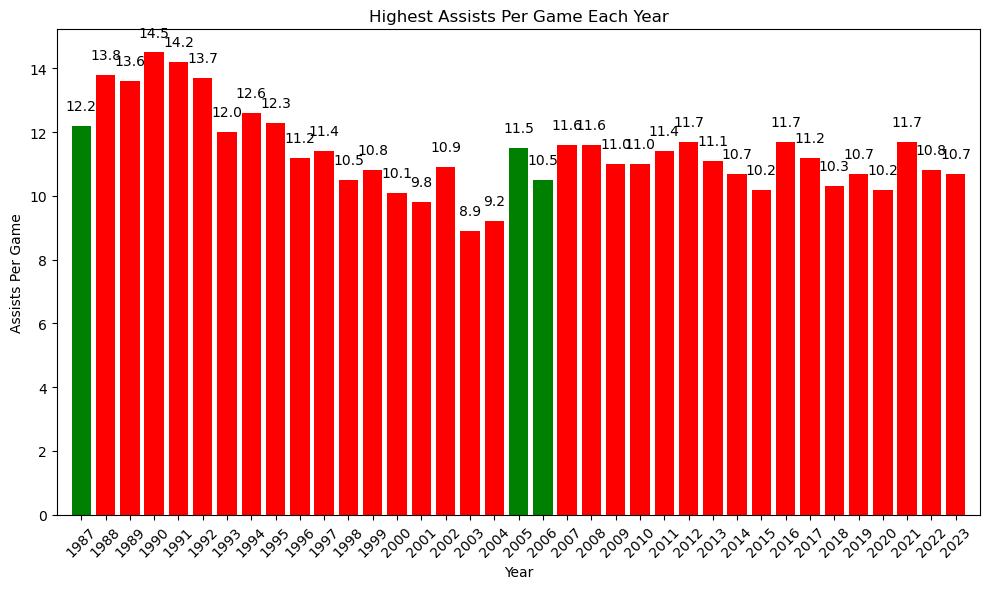

In [15]:
idx_max_ast = filtered_stats.groupby('Year')['AST'].idxmax()
highest_ast_by_year = filtered_stats.loc[idx_max_ast, ['Year', 'AST', 'Player']].reset_index(drop=True)

idx_max_share = filtered_stats.groupby('Year')['Share'].idxmax()
highest_share_by_year = filtered_stats.loc[idx_max_share, ['Year', 'Share', 'Player']].reset_index(drop=True)

#Custom Colors
colors = []
for year in highest_scoring_by_year['Year']:
    ast_player = highest_ast_by_year[highest_ast_by_year['Year'] == year]['Player'].values[0]  
    share_player = highest_share_by_year[highest_share_by_year['Year'] == year]['Player'].values[0]  
    
    if ast_player == share_player:
        colors.append('green')
    else:
        colors.append('red')

plt.figure(figsize=(10, 6))
plt.bar(highest_scoring_by_year['Year'], highest_ast_by_year['AST'], color=colors)
plt.xlabel('Year')
plt.ylabel('Assists Per Game')
plt.xticks(range(1987, 2024), rotation=45)
plt.xlim(1986, 2024)
plt.title('Highest Assists Per Game Each Year') 
plt.grid(False)
plt.tight_layout()

for i, value in enumerate(highest_ast_by_year['AST']):
    plt.text(highest_ast_by_year['Year'].iloc[i], value + 0.5, str(value), ha='center', color='black')

plt.show()

There is a lot more red on this graph. It would appear that being the leader in PPG is more important than assists per game (APG) for MVP voting. The back-to-back green bars are Steve Nash winning back-to-back MVPs in the 2005 and 2006 seasons.

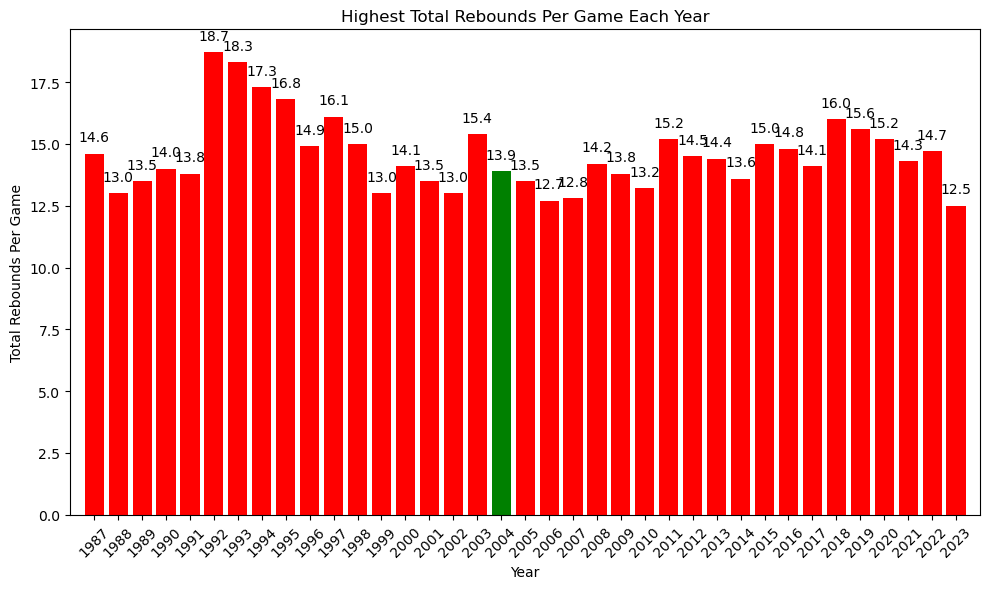

In [16]:
idx_max_trb = filtered_stats.groupby('Year')['TRB'].idxmax()
highest_trb_by_year = filtered_stats.loc[idx_max_trb, ['Year', 'TRB', 'Player']].reset_index(drop=True)

idx_max_share = filtered_stats.groupby('Year')['Share'].idxmax()
highest_share_by_year = filtered_stats.loc[idx_max_share, ['Year', 'Share', 'Player']].reset_index(drop=True)

#Custom Colors
colors = []
for year in highest_trb_by_year['Year']:
    trb_player = highest_trb_by_year[highest_trb_by_year['Year'] == year]['Player'].values[0]  
    share_player = highest_share_by_year[highest_share_by_year['Year'] == year]['Player'].values[0]  
    
    if trb_player == share_player:
        colors.append('green')
    else:
        colors.append('red')

plt.figure(figsize=(10, 6))
plt.bar(highest_trb_by_year['Year'], highest_trb_by_year['TRB'], color=colors)
plt.xlabel('Year')
plt.ylabel('Total Rebounds Per Game')
plt.xticks(range(1987, 2024), rotation=45)
plt.xlim(1986, 2024)
plt.title('Highest Total Rebounds Per Game Each Year') 
plt.grid(False)
plt.tight_layout()

for i, value in enumerate(highest_trb_by_year['TRB']):
    plt.text(highest_trb_by_year['Year'].iloc[i], value + 0.5, str(value), ha='center', color='black')

plt.show()

Only once (in our data's timeframe) has the league leader in rebounds per game won MVP! This was Kevin Garnett.

# Correlation

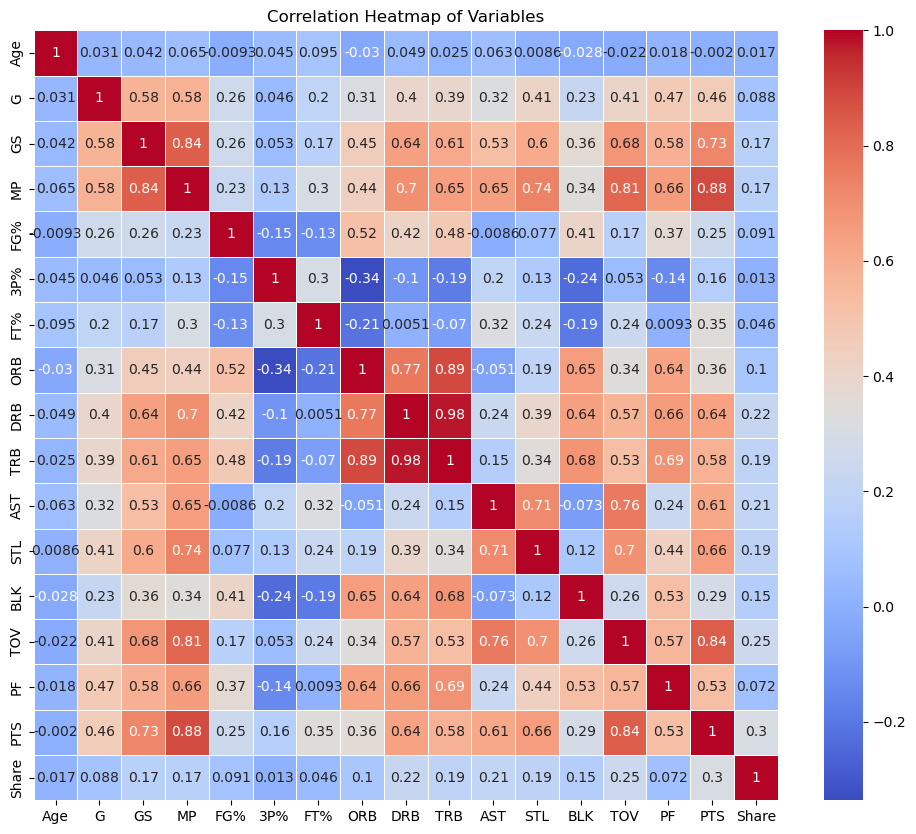

In [17]:
#Select statistics correlation matrix
player_stats = filtered_stats[['Age', 'G', 'GS', 'MP', 'FG%', '3P%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Share']]
correlation_matrix = player_stats.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

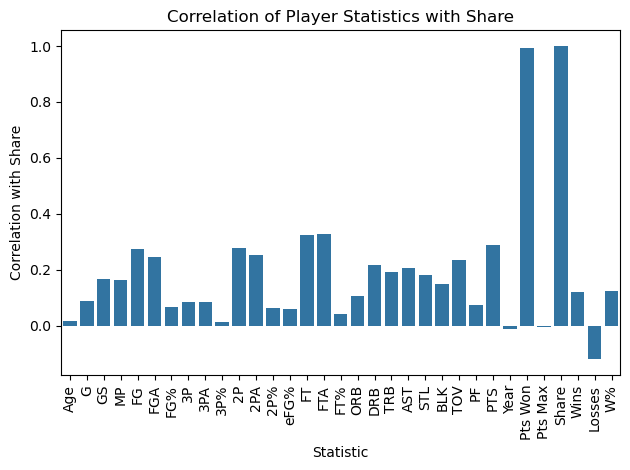

In [18]:
#Subset numeric columns
numeric_stats = all_stats.select_dtypes(include=['float64', 'int64'])

#Calculate cor
correlation_values = numeric_stats.corr()['Share']

#Graph
sns.barplot(x=correlation_values.index, y=correlation_values.values)
plt.xticks(rotation=90)
plt.xlabel('Statistic')
plt.ylabel('Correlation with Share')
plt.title('Correlation of Player Statistics with Share')
plt.tight_layout()
plt.show()

It does appear that there is a high correlation between some of the variables, such as points per game and turnovers per game. To deal with this, I will look at variance inflation factors in the modeling section and, if needed, perform some type of model selection technique to limit collinearity.